# 1.Setting up the Enviroment

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


# 2.Upload data


In [241]:
responses_df = pd.read_csv("../raw/Experiment_1/A1/n_back_responses.csv")
responses_df['start_time_unix'] = responses_df['start_time_unix'].round(-3)
responses_df.head() 

,ExperimentName,start_time_unix,Subject,Session,DataFile.Basename,Display.RefreshRate,ExperimentVersion,Group,InstructionNewMusic.DEVICE,InstructionNoMusic.DEVICE,...,TrialList8.Cycle,TrialList8.Sample,TSO,TSTh,TSvO,TSvTh,TSxO,TSxTh,TTO,TTTh
0,Experiment_1,1624262000,1,1,Experiment_1-1-1,75.03,1.0.0.251,1,Chronos,Chronos,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Experiment_1,1624262000,1,1,Experiment_1-1-1,75.03,1.0.0.251,1,Chronos,Chronos,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Experiment_1,1624262000,1,1,Experiment_1-1-1,75.03,1.0.0.251,1,Chronos,Chronos,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Experiment_1,1624262000,1,1,Experiment_1-1-1,75.03,1.0.0.251,1,Chronos,Chronos,...,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Experiment_1,1624262000,1,1,Experiment_1-1-1,75.03,1.0.0.251,1,Chronos,Chronos,...,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
eda_df = pd.read_csv('../raw/Experiment_1/A1/Left_EDA.csv')
temp_df = pd.read_csv('../raw/Experiment_1/A1/Left_TEMP.csv')
hr_df = pd.read_csv('../raw/Experiment_1/A1/Left_HR.csv')
bvp_df = pd.read_csv('../raw/Experiment_1/A1/Left_BVP.csv')



In [243]:
temp_df['start_time_unix'] = temp_df['start_time_unix'].astype('long')
temp_df.head()

,TEMP,start_time_unix,sampling_rate
0,32.79,1624262177,4.0
1,32.79,1624262177,4.0
2,32.79,1624262177,4.0
3,32.79,1624262177,4.0
4,32.79,1624262177,4.0


In [244]:
eda_df['start_time_unix'] = eda_df['start_time_unix'].astype('long')
eda_df['start_time_unix'] = eda_df['start_time_unix'].round(-3)
eda_df.head()

,EDA,start_time_unix,sampling_rate
0,0.000000,1624262000,4.0
1,0.308819,1624262000,4.0
2,0.388267,1624262000,4.0
3,0.389548,1624262000,4.0
4,0.392111,1624262000,4.0


<Axes: title={'center': 'DataFrame Plot'}>

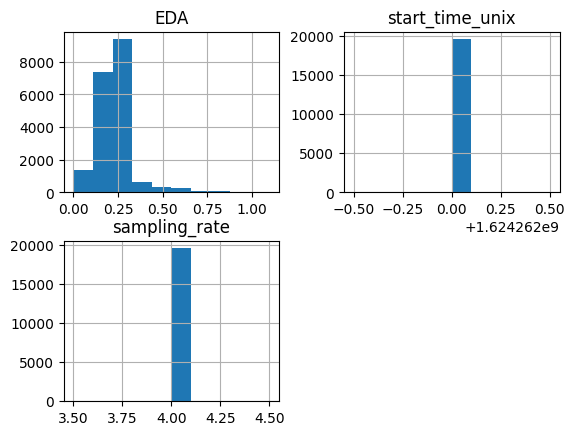

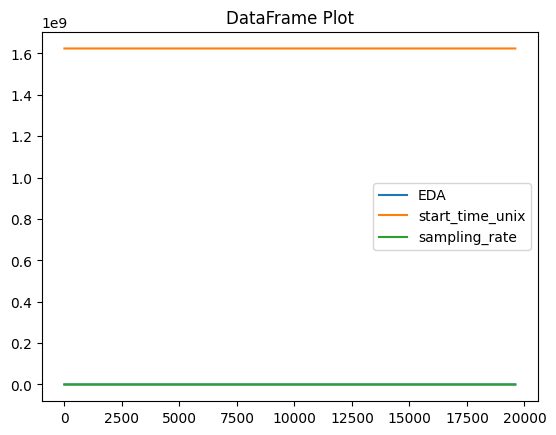

In [245]:
eda_df.hist()
eda_df.plot(title="DataFrame Plot")

# 3. Preprocessing

### 3.1.Merge DataFrames


In [ ]:
combined_df = pd.merge(responses_df, eda_df, on='start_time_unix', how='inner')
combined_df['mean_EDA'] = eda_df['EDA'].rolling(window=100).mean()
combined_df = combined_df.dropna()
combined_df.head()

MemoryError: Unable to allocate 40.6 GiB for an array with shape (191, 28540512) and data type float64

# 4: Data Splitting and Scaling

In [ ]:
X = combined_df.drop(['sampling_rate', 'start_time_unix'], axis=1)
y = combined_df['sampling_rate'] 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

# 5: Model Training

### 5.1 Using a Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

### 5.2. Using a Neural Network (MLP)

In [ ]:
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

In [ ]:
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

In [ ]:
y_pred_mlp = mlp_model.predict(X_test)
y_pred_mlp = (y_pred_mlp > 0.5).astype(int)

In [ ]:
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

# 6: Visualization

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()